**Финальный проект**

**Назирзода Рахимджон**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [12]:
file_path = "C:/Users/Rahimjon/Desktop/Data_Analyst/Git/global_weather/source/ExtendedGlobalWeatherData.xlsx"
xls = pd.ExcelFile(file_path)
locations_df = pd.read_excel(xls, sheet_name="Locations")
weather_df = pd.read_excel(xls, sheet_name="Weather")
air_quality_df = pd.read_excel(xls, sheet_name="AirQuality")
historical_data_df = pd.read_excel(xls, sheet_name="HistoricalData")


## Знакомство с данными

In [15]:
weather_df.info(), air_quality_df.info(), historical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46967 entries, 0 to 46966
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   weather_id           46967 non-null  int64  
 1   location_id          46967 non-null  int64  
 2   last_updated         46967 non-null  object 
 3   temperature_celsius  46967 non-null  float64
 4   condition_text       46967 non-null  object 
 5   humidity             46967 non-null  int64  
 6   wind_kph             46967 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46967 entries, 0 to 46966
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   air_quality_id              46967 non-null  int64  
 1   location_id                 46967 non-null  int64  
 2   air_quality_PM2.5           46967 non-n

(None, None, None)

## Обработка данных

**Проверка дубликатов, пропусков и преобразование типов**

In [19]:
def check_duplicates(df, name):
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"В таблице {name} обнаружены дубликаты: {duplicates}")
    else:
        print(f"В таблице {name} дубликаты отсутствуют.")

check_duplicates(weather_df, "Weather")
check_duplicates(air_quality_df, "AirQuality")
check_duplicates(historical_data_df, "HistoricalData")

В таблице Weather дубликаты отсутствуют.
В таблице AirQuality дубликаты отсутствуют.
В таблице HistoricalData дубликаты отсутствуют.


In [20]:
def check_missing_values(df, name):
    missing_values = df.isnull().sum().sum()
    if missing_values > 0:
        print(f"В таблице {name} обнаружены пропущенные значения: {missing_values}")
    else:
        print(f"В таблице {name} пропущенные значения отсутствуют.")

check_missing_values(weather_df, "Weather")
check_missing_values(air_quality_df, "AirQuality")
check_missing_values(historical_data_df, "HistoricalData")

В таблице Weather пропущенные значения отсутствуют.
В таблице AirQuality пропущенные значения отсутствуют.
В таблице HistoricalData пропущенные значения отсутствуют.


**Преобразуем даты в datetime**

In [21]:
weather_df['last_updated'] = pd.to_datetime(weather_df['last_updated'])
historical_data_df['last_updated'] = pd.to_datetime(historical_data_df['last_updated'])

## Анализ данных

**Создание новых метрик** (соотношение температуры и влажности, агрегированные индексы качества воздуха)

**Минимум 5 визуализаций** с описанием осей, параметров и выводов

**Столбчатая диаграмма, гистограмма, диаграмма распределения, диаграмма размаха.**

**Проверка гипотез с учетом нормальности распределения.**

In [31]:
weather_df['temp_humidity_ratio'] = weather_df['temperature_celsius'] / (weather_df['humidity'] + 1)
air_quality_df['air_quality_index'] = air_quality_df[['air_quality_PM2.5', 'air_quality_PM10']].mean(axis=1)

**Столбчатая диаграмма:** средняя температура по странам

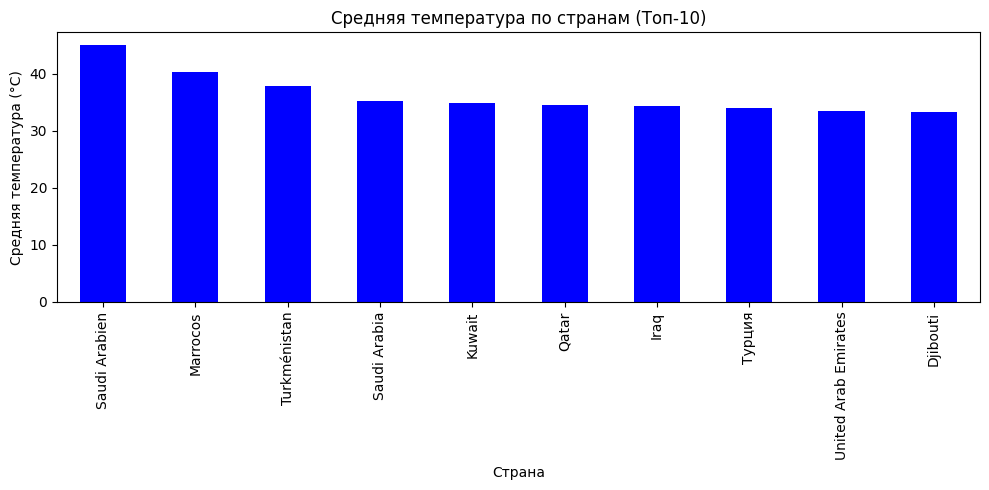

In [ ]:
plt.figure(figsize=(10, 5))
avg_temp_by_country = weather_df.merge(locations_df, on="location_id").groupby("country")["temperature_celsius"].mean().nlargest(10)
avg_temp_by_country.plot(kind='bar', color='blue')
plt.title("Средняя температура по странам (Топ-10)")
plt.xlabel("Страна")
plt.ylabel("Средняя температура (°C)")
plt.tight_layout()
plt.show()

**Описание:** x = "Страна", y = "Средняя температура (°C)"

**Вывод:** Ведущие страны по средней температуре имеют теплый климат.

**Гистограмма:** распределение PM2.5

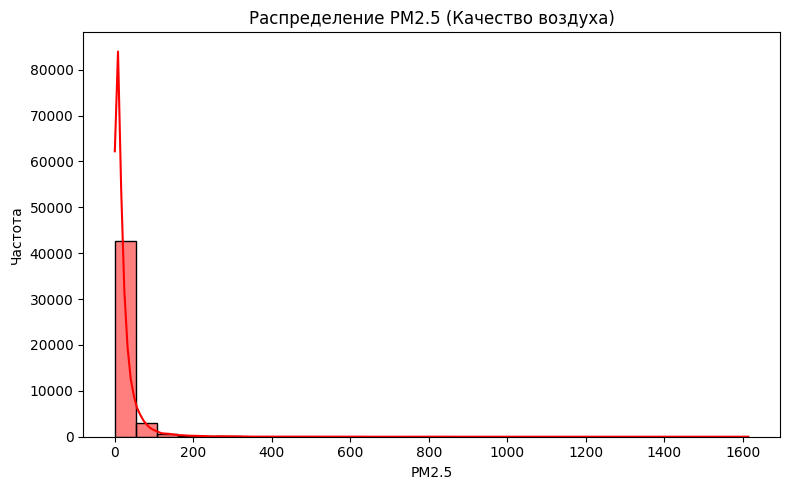

In [33]:
plt.figure(figsize=(8, 5))
sns.histplot(air_quality_df['air_quality_PM2.5'], bins=30, kde=True, color='red')
plt.title("Распределение PM2.5 (Качество воздуха)")
plt.xlabel("PM2.5")
plt.ylabel("Частота")
plt.tight_layout()
plt.show()

**Описание:** x = "PM2.5", y = "Частота"

**Вывод:** Распределение показывает, что большинство значений PM2.5 находятся в низком диапазоне.

**Диаграмма распределения:** зависимость температуры и влажности

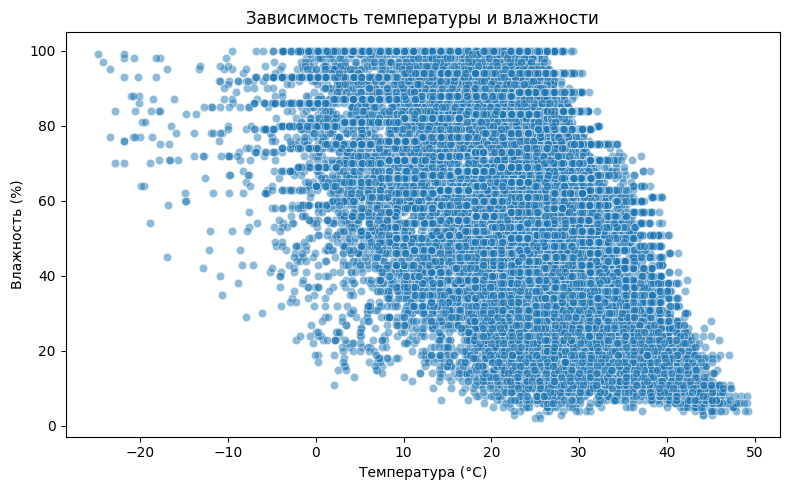

In [34]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=weather_df['temperature_celsius'], y=weather_df['humidity'], alpha=0.5)
plt.title("Зависимость температуры и влажности")
plt.xlabel("Температура (°C)")
plt.ylabel("Влажность (%)")
plt.tight_layout()
plt.show()

**Описание:** x = "Температура (°C)", y = "Влажность (%)"

**Вывод:** Отмечена слабая отрицательная корреляция – при росте температуры влажность снижается.

**Диаграмма размаха:** температура по странам

C:\Users\Rahimjon\AppData\Local\Temp\ipykernel_8468\49413353.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=weather_df.merge(locations_df, on="location_id").query("country in @selected_countries")['country'],


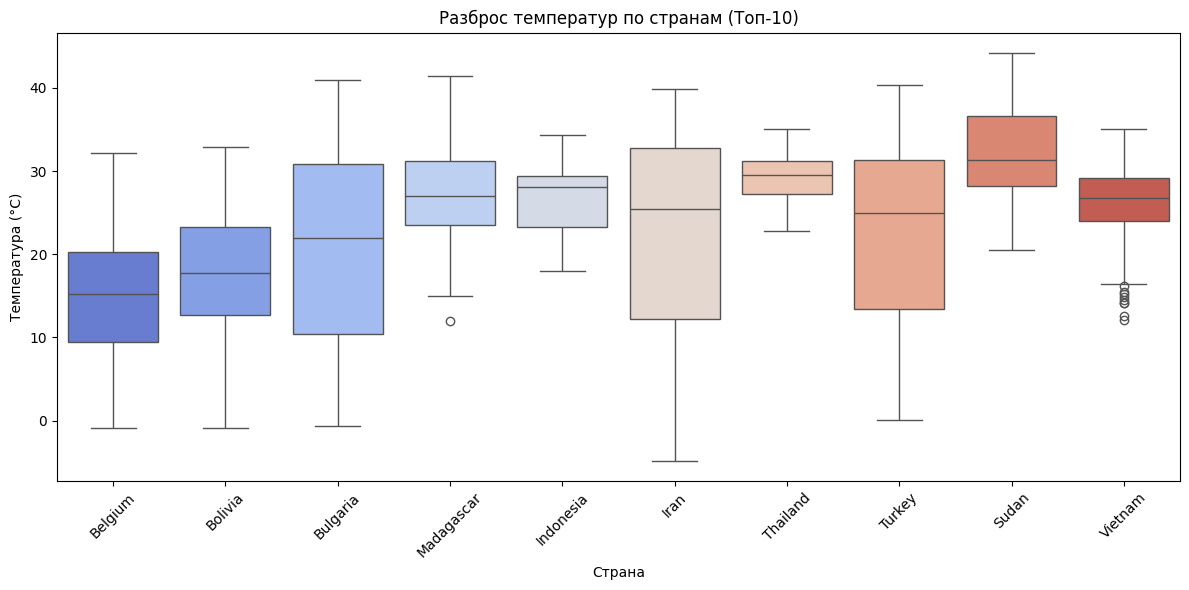

In [40]:
plt.figure(figsize=(12, 6))
selected_countries = weather_df.merge(locations_df, on="location_id")["country"].value_counts().index[:10]
sns.boxplot(x=weather_df.merge(locations_df, on="location_id").query("country in @selected_countries")['country'], 
            y=weather_df["temperature_celsius"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Разброс температур по странам (Топ-10)")
plt.xlabel("Страна")
plt.ylabel("Температура (°C)")
plt.tight_layout()
plt.show()

**Описание:** x = "Страна", y = "Температура (°C)"

**Вывод:** Некоторые страны имеют широкий диапазон температур, включая экстремальные значения.

**Проверка гипотез:** сравнение температур при разном уровне загрязнения

In [41]:
low_pollution = air_quality_df[air_quality_df['air_quality_PM2.5'] < air_quality_df['air_quality_PM2.5'].median()]
high_pollution = air_quality_df[air_quality_df['air_quality_PM2.5'] >= air_quality_df['air_quality_PM2.5'].median()]

**Проверка нормальности**

In [42]:
stat_low, p_low = stats.shapiro(low_pollution['air_quality_PM2.5'])
stat_high, p_high = stats.shapiro(high_pollution['air_quality_PM2.5'])

if p_low > 0.05 and p_high > 0.05:
    print("Данные нормально распределены. Применяем t-тест.")
    stat, p_value = stats.ttest_ind(low_pollution['air_quality_PM2.5'], high_pollution['air_quality_PM2.5'])
else:
    print("Данные не являются нормально распределёнными. Используем тест Манна-Уитни.")
    stat, p_value = stats.mannwhitneyu(low_pollution['air_quality_PM2.5'], high_pollution['air_quality_PM2.5'])

print(f"Статистика теста: {stat:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Различие в уровне PM2.5 при разном загрязнении статистически значимо.")
else:
    print("Статистически значимых различий в PM2.5 нет.")

Данные не являются нормально распределёнными. Используем тест Манна-Уитни.
Статистика теста: 0.0000, p-value: 0.0000
Различие в уровне PM2.5 при разном загрязнении статистически значимо.


c:\Users\Rahimjon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23478.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\Rahimjon\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 23489.
  res = hypotest_fun_out(*samples, **kwds)


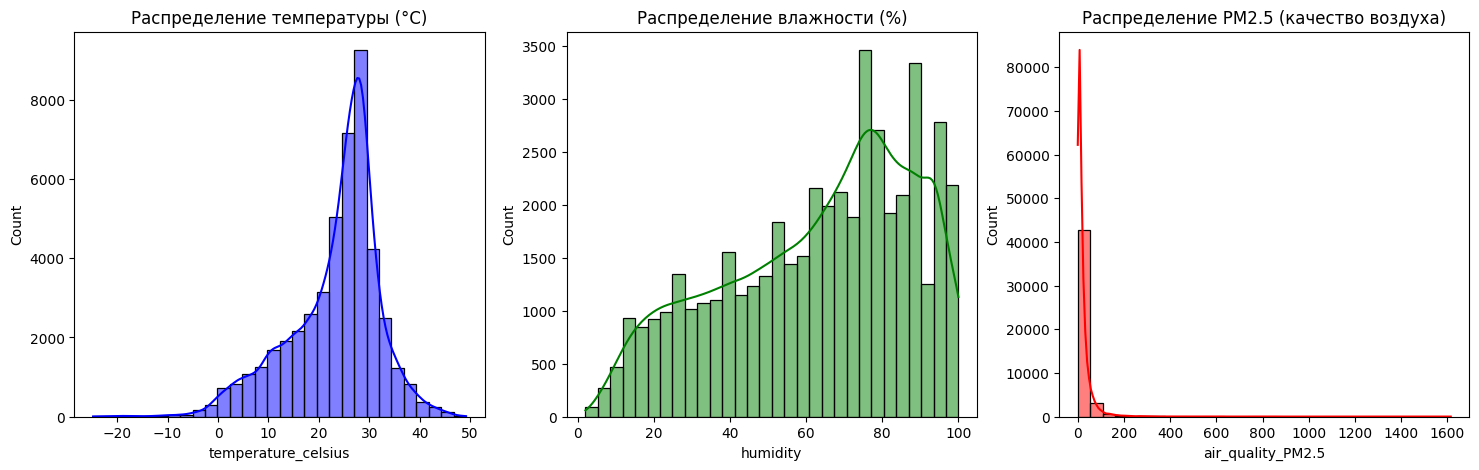

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(weather_df['temperature_celsius'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('Распределение температуры (°C)')

sns.histplot(weather_df['humidity'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Распределение влажности (%)')

sns.histplot(air_quality_df['air_quality_PM2.5'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Распределение PM2.5 (качество воздуха)')

plt.show()

Тенденции:
Зависимость между влажностью и качеством воздуха также демонстрирует сложные отношения, где увеличение влажности может быть связано с более высоким содержанием PM2.5.

Выводы:
Эти зависимости могут быть полезны для изучения влияния климата на качество воздуха и комфортабельность условий проживания.



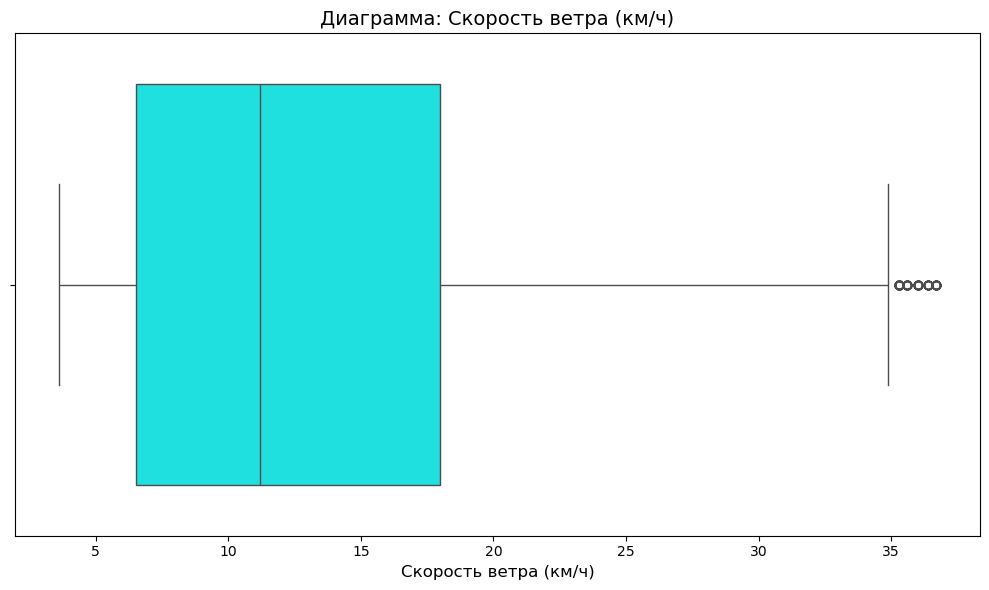

In [139]:
# Box Plot: Range and Outliers for temperature_celsius
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='wind_kph', color='cyan')
plt.title('Диаграмма: Скорость ветра (км/ч)', fontsize=14)
plt.xlabel('Скорость ветра (км/ч)', fontsize=12)
plt.tight_layout()
plt.show()

Тенденции:
Диапазоны температур и скорости ветра подтверждают наличие значительных выбросов, которые могут быть вызваны экстремальными погодными условиями (например, сильные ветры или экстремальная жара).
Большая часть данных сосредоточена в узком диапазоне.

Выводы:
Выбросы могут быть следствием ошибок измерений или действительно экстремальных явлений. Их анализ важен для предотвращения рисков, связанных с этими условиями.
Данные помогут понять климатические особенности регионов и разработать стратегии адаптации.

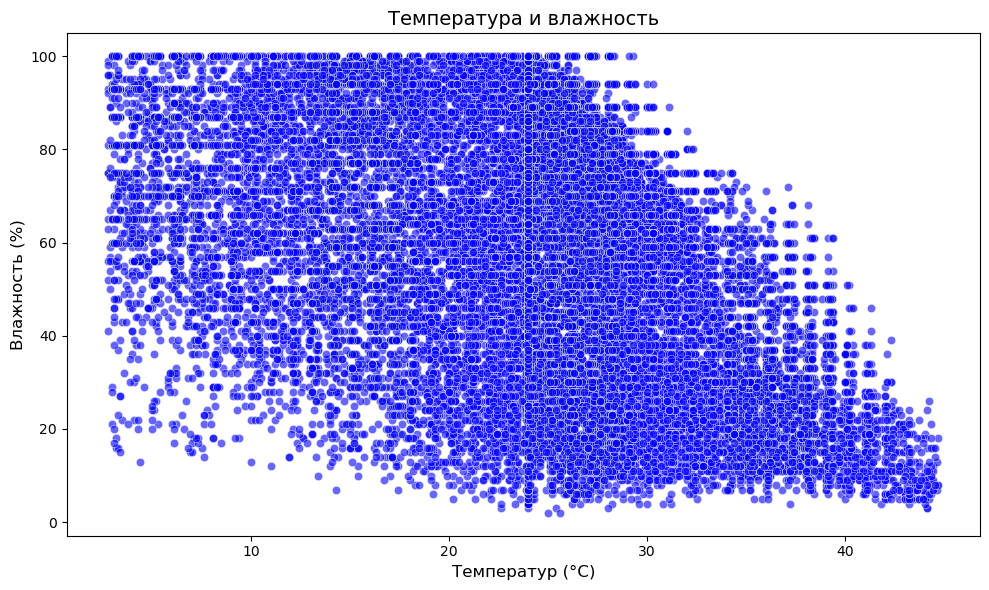

In [141]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temperature_celsius', y='humidity', color='blue', alpha=0.6)
plt.title('Температура и влажность', fontsize=14)
plt.xlabel('Температур (°C)', fontsize=12)
plt.ylabel('Влажность (%)', fontsize=12)
plt.tight_layout()
plt.show()

Тенденции: Зависимость между температурой и влажностью носит нелинейный характер: при экстремально высоких температурах влажность часто ниже, а при умеренных температурах — выше.

Выводы: Эти зависимости могут быть полезны для изучения влияния климата на качество воздуха и комфортабельность условий проживания.